In [1]:
# Load Python Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import joblib
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,BaggingClassifier
import xgboost as xgb
from sklearn.metrics import roc_curve
import os

# Absolute path 
sab_absolute_path = os.path.dirname(os.path.abspath("__file__"))

In [2]:
# Loading the Dataset

columns_list=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income category']
df_new= pd.read_csv(sab_absolute_path+'/Dataset/adult.data',names=columns_list,sep=',')

In [3]:
# Data Visualization
df_new.info()
df_new.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   workclass        32561 non-null  object
 2   fnlwgt           32561 non-null  int64 
 3   education        32561 non-null  object
 4   education-num    32561 non-null  int64 
 5   marital-status   32561 non-null  object
 6   occupation       32561 non-null  object
 7   relationship     32561 non-null  object
 8   race             32561 non-null  object
 9   sex              32561 non-null  object
 10  capital-gain     32561 non-null  int64 
 11  capital-loss     32561 non-null  int64 
 12  hours-per-week   32561 non-null  int64 
 13  native-country   32561 non-null  object
 14  income category  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income category
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,29,Local-gov,115585,Some-college,10,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,50,United-States,<=50K
96,48,Self-emp-not-inc,191277,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,60,United-States,>50K
97,37,Private,202683,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,48,United-States,>50K
98,48,Private,171095,Assoc-acdm,12,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,England,<=50K


In [4]:
# missing '?' values in Dataset
print(df_new.workclass.value_counts())
print(df_new.occupation.value_counts())
print(df_new['native-country'].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64
 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                    

In [5]:
# Replacing the missing value with Most Frequently Occurring Values in each 3 columns
df_new['workclass']= df_new['workclass'].str.replace("?","Private",regex=True)
df_new['occupation']= df_new['occupation'].str.replace("?","Prof-specialty",regex=True)
df_new['native-country']= df_new['native-country'].str.replace("?","United-States",regex=True)

In [6]:
# visualize the Missing value removal

print(df_new.workclass.value_counts())
print(df_new.occupation.value_counts())
print(df_new['native-country'].value_counts())
print(df_new.isnull().sum())

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64
 United-States                 29753
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England    

In [7]:
# converting the categorical data to Numerical Data

category_col =['workclass', 'education','marital-status', 'occupation',
               'relationship', 'native-country','race', 'sex','income category']



labelEncoder = preprocessing.LabelEncoder()

for col in category_col:
    df_new[col] = labelEncoder.fit_transform(df_new[col])

# SquareRoot and CubeRoot Transformation which makes the ML model to learn easily
df_new['fnlwgt']= np.sqrt(df_new['fnlwgt'])
df_new['capital-loss']= np.cbrt(df_new['capital-loss'])
df_new['capital-gain']=np.cbrt(df_new['capital-gain'])
# making a copy of the data frame

df_new.to_csv(sab_absolute_path+'/Dataset/adult_PPNumerical.csv',index=False)


In [8]:
# view the converted dataframe
df_new.head(100)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income category
0,39,6,278.416954,9,13,4,0,1,4,1,12.954476,0.000000,40,38,0
1,50,5,288.636450,9,13,2,3,0,4,1,0.000000,0.000000,13,38,0
2,38,3,464.377002,11,9,0,5,1,4,1,0.000000,0.000000,40,38,0
3,53,3,484.480134,1,7,2,5,0,2,1,0.000000,0.000000,40,38,0
4,28,3,581.729318,9,13,2,9,5,2,0,0.000000,0.000000,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,29,1,339.977940,15,10,4,5,1,4,1,0.000000,0.000000,50,38,0
96,48,5,437.352261,10,16,2,9,0,4,1,0.000000,12.389968,60,38,1
97,37,3,450.203287,15,10,2,11,0,4,1,0.000000,0.000000,48,38,1
98,48,3,413.636314,7,12,0,3,4,4,0,0.000000,0.000000,40,8,0


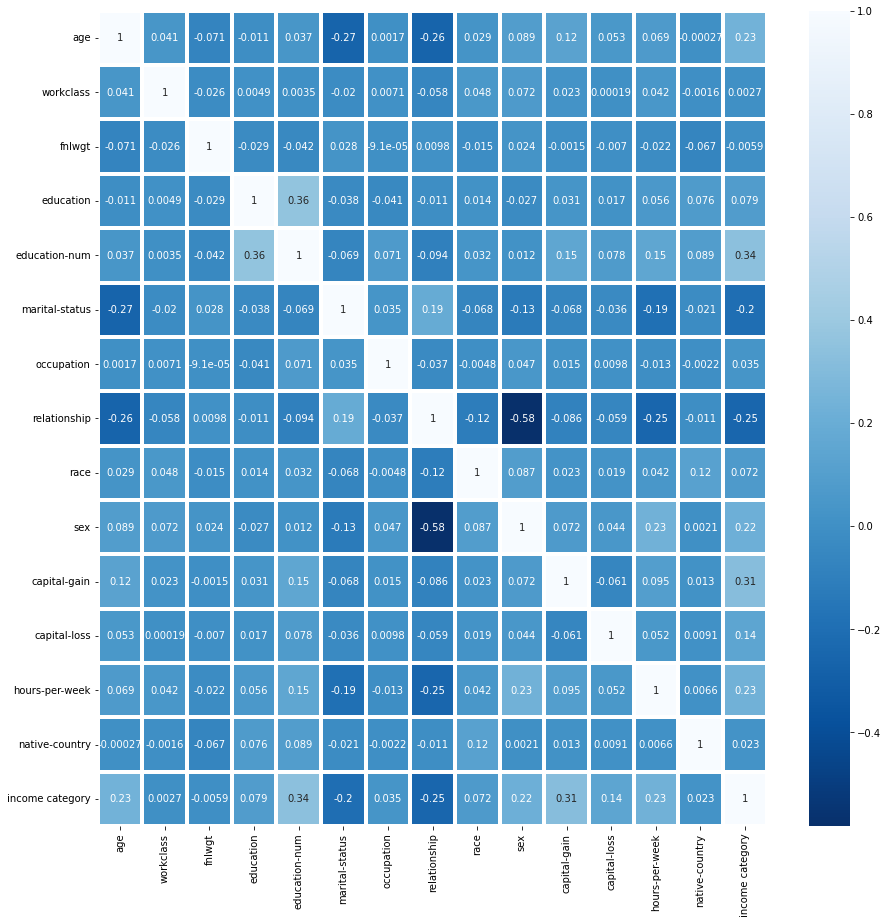

In [9]:
# correlation between the preprocessed data
fig, ax = plt.subplots(figsize=(15,15))
Hm=sns.heatmap(df_new.corr(),annot=True,linewidths=3.5, ax=ax,cmap = "Blues_r")
figure=Hm.get_figure()
figure.savefig(sab_absolute_path+'/Metrics_Images/CorelationHM_PPNumeric',dpi=560)

In [10]:
# Split the train and Test data

sc = StandardScaler()
ds_x=df_new.drop('income category',axis='columns')
data =sc.fit_transform(ds_x)
x=pd.DataFrame(data,columns=ds_x.columns)
# split data into dependent and independent before scaling
X = df_new.values[:, 0:14]
X= sc.fit_transform(X)
y = df_new.values[:,14]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 11)


In [11]:
# shape of the input data to be passed through the ML classifiers
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X)

(22792, 14)
(9769, 14)
(22792,)
(9769,)
[[ 0.03067056  2.62429763 -1.17386922 ... -0.22055547 -0.03542945
   0.26136999]
 [ 0.83710898  1.72109965 -1.08846337 ... -0.22055547 -2.22215312
   0.26136999]
 [-0.04264203 -0.08529633  0.38022654 ... -0.22055547 -0.03542945
   0.26136999]
 ...
 [ 1.42360965 -0.08529633 -0.24338947 ... -0.22055547 -0.03542945
   0.26136999]
 [-1.21564337 -0.08529633  0.2506855  ... -0.22055547 -1.65522476
   0.26136999]
 [ 0.98373415  0.81790166  0.98370706 ... -0.22055547 -0.03542945
   0.26136999]]


In [12]:
# creating instances for classification models

xg=xgb.XGBClassifier(random_state = 11,booster='dart',colsample_bytree=0.8,subsample=0.9,learning_rate= 0.00001,max_depth=13,min_child_weight=1.5,max_delta_step=10)
svc =SVC(random_state = 11)
lg =LogisticRegression(random_state = 11)
bg=BaggingClassifier(random_state = 11)
rf=RandomForestClassifier(random_state = 11)
gb=GradientBoostingClassifier(random_state = 15)


In [13]:
for i in [xg,svc,lg,bg,rf,gb]:
    i.fit(X_train,y_train)
    pred =i.predict(X_test)
    test_score=accuracy_score(y_test,pred)
    train_score=accuracy_score(y_train,i.predict(X_train))
    print(i)
    print('Accuracy Score for test data,',accuracy_score(y_test,pred)*100)
    print('Accuracy Score for train data',accuracy_score(y_train,i.predict(X_train))*100)
    print(classification_report(y_test,pred))
    print('Confusion Matrix for the Model',i)
    print(confusion_matrix(y_test,pred))
    print('................................................................')

XGBClassifier(base_score=0.5, booster='dart', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=1e-05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=10, max_depth=13, max_leaves=0,
              min_child_weight=1.5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=11, reg_alpha=0, reg_lambda=1, ...)
Accuracy Score for test data, 86.59023441498618
Accuracy Score for train data 89.07511407511407
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91      7490
         1.0       0.75      0.63      0.69      2279

    accuracy                           0.8

In [14]:
# Performing KFold cross Validation with highest accuracy model: Gradient Boosting Clasifier

for i in range(2,11):
    cv = cross_val_score(gb,X,y,cv=i)
    print('KFold:',i,gb,cv.mean())

KFold: 2 GradientBoostingClassifier(random_state=15) 0.8639784553134471
KFold: 3 GradientBoostingClassifier(random_state=15) 0.8644391356032023
KFold: 4 GradientBoostingClassifier(random_state=15) 0.8642548206714157
KFold: 5 GradientBoostingClassifier(random_state=15) 0.8638863597695933
KFold: 6 GradientBoostingClassifier(random_state=15) 0.8644083793036476
KFold: 7 GradientBoostingClassifier(random_state=15) 0.8640399874381306
KFold: 8 GradientBoostingClassifier(random_state=15) 0.8639171822388476
KFold: 9 GradientBoostingClassifier(random_state=15) 0.8637019237259671
KFold: 10 GradientBoostingClassifier(random_state=15) 0.8644699301975937


In [15]:
# Performing KFold cross Validation with highest accuracy model: XgBoost Clasifier

for i in range(2,11):
    cv = cross_val_score(xg,x,y,cv=i)
    print('KFold:',i,xg,cv.mean())

KFold: 2 XGBClassifier(base_score=0.5, booster='dart', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=1e-05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=10, max_depth=13, max_leaves=0,
              min_child_weight=1.5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=11, reg_alpha=0, reg_lambda=1, ...) 0.860692291869738
KFold: 3 XGBClassifier(base_score=0.5, booster='dart', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_po

In [16]:
# hyper tuning the model
params ={'learning_rate':[0.1,0.01],'max_depth':[3,4,5],'min_samples_leaf':[1,2],
         'min_samples_split':[2,3],'n_estimators':[10,50,100],'random_state':[15]}

In [19]:
gcv=GridSearchCV(gb,params)
gcv.fit(X_train,y_train)


GridSearchCV(estimator=GradientBoostingClassifier(random_state=15),
             param_grid={'learning_rate': [0.1, 0.01], 'max_depth': [3, 4, 5],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [10, 50, 100], 'random_state': [15]})

In [29]:
# save the best model GradientBoostingClassifier with Hyper Tuned using grid space
filename= sab_absolute_path+'/Best_Models/GBC_income_predict.sav'
joblib.dump(gcv,filename)

['/Users/sabareeswarans/Desktop/BD_Lab/lab5_income_predict/Best_Models/GBC_income_predict.sav']

In [30]:
# save the best model XGBoost with Hyper Tuned
filename2= sab_absolute_path+'/Best_Models/xgb_income_predict.sav'
joblib.dump(xg,filename2)

['/Users/sabareeswarans/Desktop/BD_Lab/lab5_income_predict/Best_Models/xgb_income_predict.sav']

In [22]:
# loading the saved model 1 ....
loaded_model=joblib.load(filename)
pred_best =loaded_model.predict(X_test)
test_score_best=accuracy_score(y_test,pred_best)
train_score_best=accuracy_score(y_train,loaded_model.predict(X_train))
print('Hyper Tuned model:GradientBoostingClassifier, Test Accuracy:',test_score_best*100)
print('Hyper tuned model:GradientBoostingClassifier, Train Accuracy:',train_score_best*100)
print("Confusion Matrix")
best_model_array_con=confusion_matrix(y_test,pred_best)
print(confusion_matrix(y_test,pred_best))

Hyper Tuned model:GradientBoostingClassifier, Test Accuracy: 87.23513153854027
Hyper tuned model:GradientBoostingClassifier, Train Accuracy: 88.5968760968761
Confusion Matrix
[[7057  433]
 [ 814 1465]]


In [23]:
# Loading the saved model 2....
loaded_model=joblib.load(filename2)
pred_best2 =loaded_model.predict(X_test)
test_score_best2=accuracy_score(y_test,pred_best2)
train_score_best2=accuracy_score(y_train,loaded_model.predict(X_train))
print('Hyper Tuned model:XGBoost, Test Accuracy:',test_score_best2*100)
print('Hyper Tuned model:XGBoost,Train Accuracy:',train_score_best2*100)
print("Confusion Matrix")
best_model_array_con2=confusion_matrix(y_test,pred_best2)
print(confusion_matrix(y_test,pred_best2))

Hyper Tuned model:XGBoost, Test Accuracy: 86.59023441498618
Hyper Tuned model:XGBoost,Train Accuracy: 89.07511407511407
Confusion Matrix
[[7020  470]
 [ 840 1439]]


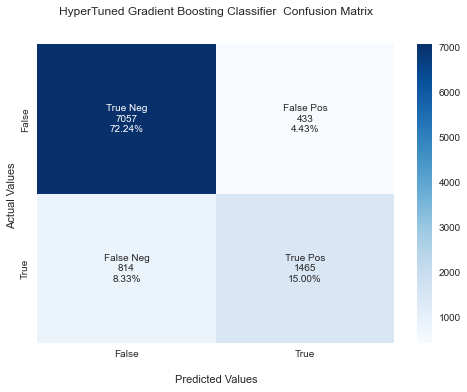

In [28]:
# Model 1 Confusion matrix
array = best_model_array_con
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                array.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     array.flatten()/np.sum(array)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(array, annot=labels, fmt='', cmap='Blues')

ax.set_title('HyperTuned Gradient Boosting Classifier  Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.savefig(sab_absolute_path+'/Metrics_Images/GBCConMatrix',dpi=500)
plt.show()

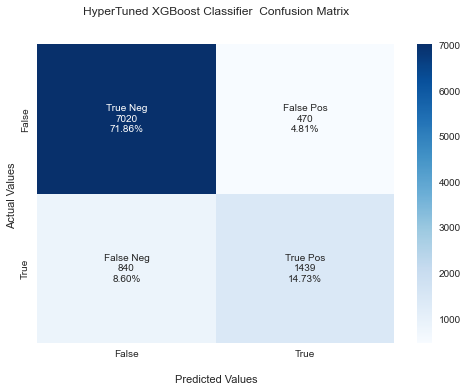

In [27]:
# Model 2 confusion matrix
array = best_model_array_con2
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                array.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     array.flatten()/np.sum(array)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(array, annot=labels, fmt='', cmap='Blues')

ax.set_title('HyperTuned XGBoost Classifier  Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.

plt.savefig(sab_absolute_path+'/Metrics_Images/XgboostConMatrix',dpi=500)
plt.show()

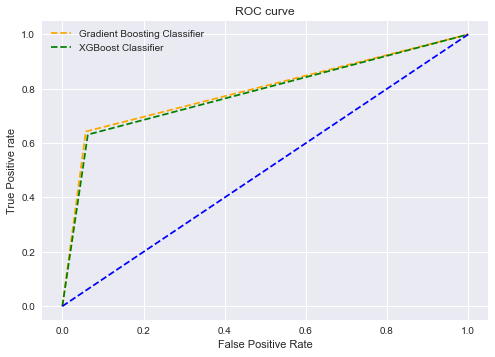

In [26]:

# ROC Curve - Performance measurement of the classification Problem.
# model1- GBC

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred_best,pos_label=1)
# model2- XGBoost
false_positive_rate2, true_positive_rate2, thresholds2 = roc_curve(y_test,pred_best2,pos_label=1)
plt.style.use('seaborn')

# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
R_false_positive_rate, R_true_positive_rate, _thr = roc_curve(y_test, random_probs, pos_label=1)


# plot roc curves
plt.plot(false_positive_rate, true_positive_rate, linestyle='--',color='orange', label='Gradient Boosting Classifier')
plt.plot(false_positive_rate2, true_positive_rate2, linestyle='--',color='green', label='XGBoost Classifier')
plt.plot(R_false_positive_rate, R_true_positive_rate, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig(sab_absolute_path+'/Metrics_Images/ROC',dpi=300)
plt.show();


